In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
%pwd
%cd ..

/Users/ENZO/KOOKIZ/GITHUB/translate-handsign


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
actions = ["답답하다", "땀난다", "베였다", "부었다", "불편하다",
           "아프다", "어지럽다", "열난다", "지속된다", "피곤하다"]
time_num, time_num1, time_num2 = '1744797254', '1744797393', '1744797530'

for time_num in [time_num, time_num1, time_num2]:
    data = np.concatenate([
        np.load(f'dataset/seq_아프다_{time_num}.npy'),
        np.load(f'dataset/seq_열난다_{time_num}.npy'),
        np.load(f'dataset/seq_답답하다_{time_num}.npy'),
        np.load(f'dataset/seq_땀난다_{time_num}.npy'),
        np.load(f'dataset/seq_베였다_{time_num}.npy'),
        np.load(f'dataset/seq_부었다_{time_num}.npy'),
        np.load(f'dataset/seq_불편하다_{time_num}.npy'),
        np.load(f'dataset/seq_어지럽다_{time_num}.npy'),
        np.load(f'dataset/seq_지속된다_{time_num}.npy'),
        np.load(f'dataset/seq_피곤하다_{time_num}.npy')
    ], axis=0)

data.shape

(451, 10, 56)

In [4]:
# print(np.load(f'dataset/seq_아프다_1744773358.npy').shape)
# print(np.load(f'dataset/seq_열_1744773358.npy').shape)
# print(np.load(f'dataset/seq_기침_1744773358.npy').shape)
# print(np.load(f'dataset/seq_콧물_1744773358.npy').shape)
# print(np.load(f'dataset/seq_코막힘_1744773358.npy').shape)
# print(np.load(f'dataset/seq_머리_1744773358.npy').shape)
# print(np.load(f'dataset/seq_배_1744773358.npy').shape)
# print(np.load(f'dataset/seq_설사_1744773358.npy').shape)
# print(np.load(f'dataset/seq_변비_1744773358.npy').shape)
# print(np.load(f'dataset/seq_구토_1744773358.npy').shape)

In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(451, 10, 55)
(451,)


In [6]:
labels

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [7]:
len(labels)

451

In [8]:
np.unique(labels)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [9]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(451, 10)

In [10]:
y_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [11]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2020)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(360, 10, 55) (360, 10)
(91, 10, 55) (91, 10)


In [12]:
x_train.shape[1:3]

(10, 55)

In [13]:
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [14]:
# custom f1 score
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(len(actions), activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',metric_F1score])
model.summary()

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        30,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,130 (129.41 KB)

 Trainable params: 33,130 (129.41 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_metric_F1score', min_delta = 0, patience = 20, mode = 'max')


history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/multi_hand_gesture_classifier.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_metric_F1score', factor=0.5, patience=50, verbose=1, mode='auto'),
        early_stopping
    ]
)

Epoch 1/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.1250 - loss: 41.5442 - metric_f1score: 0.1270
Epoch 1: val_acc improved from -inf to 0.28571, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.1451 - loss: 32.2005 - metric_f1score: nan - val_acc: 0.2857 - val_loss: 9.4083 - val_metric_f1score: 0.2508 - learning_rate: 0.0010
Epoch 2/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.1250 - loss: 8.8131 - metric_f1score: 0.1111
Epoch 2: val_acc improved from 0.28571 to 0.53846, saving model to models/multi_hand_gesture_classifier.h5


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate.
  callback.on_epoch_end(epoch, logs)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate
  current = self.get_monitor_value(logs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.1642 - loss: 11.3929 - metric_f1score: 0.1472 - val_acc: 0.5385 - val_loss: 4.7527 - val_metric_f1score: 0.4294 - learning_rate: 0.0010
Epoch 3/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.2500 - loss: 7.4836 - metric_f1score: 0.2642
Epoch 3: val_acc improved from 0.53846 to 0.67033, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2992 - loss: 6.7149 - metric_f1score: 0.2885 - val_acc: 0.6703 - val_loss: 2.3822 - val_metric_f1score: 0.5654 - learning_rate: 0.0010
Epoch 4/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.5000 - loss: 4.0692 - metric_f1score: 0.4615
Epoch 4: val_acc improved from 0.67033 to 0.73626, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4017 - loss: 4.3149 - metric_f1score: 0.3686 - val_acc: 0.7363 - val_loss: 2.1487 - val_metric_f1score: 0.6110 - learning_rate: 0.0010
Epoch 5/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.4375 - loss: 3.8420 - metric_f1score: 0.4074
Epoch 5: val_acc improved from 0.73626 to 0.80220, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4228 - loss: 4.0738 - metric_f1score: 0.4060 - val_acc: 0.8022 - val_loss: 1.9371 - val_metric_f1score: 0.7052 - learning_rate: 0.0010
Epoch 6/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.4688 - loss: 3.4498 - metric_f1score: 0.4727
Epoch 6: val_acc improved from 0.80220 to 0.91209, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5099 - loss: 3.2285 - metric_f1score: 0.4952 - val_acc: 0.9121 - val_loss: 1.6604 - val_metric_f1score: 0.8383 - learning_rate: 0.0010
Epoch 7/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.5000 - loss: 3.2558 - metric_f1score: 0.4314
Epoch 7: val_acc improved from 0.91209 to 0.92308, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5108 - loss: 3.2276 - metric_f1score: 0.4904 - val_acc: 0.9231 - val_loss: 1.5928 - val_metric_f1score: 0.8660 - learning_rate: 0.0010
Epoch 8/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.5625 - loss: 3.1175 - metric_f1score: 0.5455
Epoch 8: val_acc improved from 0.92308 to 0.93407, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.6072 - loss: 2.6383 - metric_f1score: 0.5768 - val_acc: 0.9341 - val_loss: 1.4348 - val_metric_f1score: 0.9384 - learning_rate: 0.0010
Epoch 9/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - acc: 0.5625 - loss: 3.0927 - metric_f1score: 0.5091
Epoch 9: val_acc improved from 0.93407 to 0.95604, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5966 - loss: 2.5681 - metric_f1score: 0.5973 - val_acc: 0.9560 - val_loss: 1.3643 - val_metric_f1score: 0.9498 - learning_rate: 0.0010
Epoch 10/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.6250 - loss: 2.3073 - metric_f1score: 0.6102
Epoch 10: val_acc did not improve from 0.95604
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.6634 - loss: 2.1962 - metric_f1score: 0.6463 - val_acc: 0.9560 - val_loss: 1.3141 - val_metric_f1score: 0.9449 - learning_rate: 0.0010
Epoch 11/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.7188 - loss: 1.8688 - metric_f1score: 0.6786
Epoch 11: val_acc improved from 0.95604 to 0.96703, saving model to models/multi_hand_gesture_classifier.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.7218 - loss: 2.0371 - metric_f1score: 0.7028 - val_acc: 0.9670 - val_loss: 1.1917 - val_metric_f1score: 0.9600 - learning_rate: 0.0010
Epoch 12/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.7812 - loss: 1.7191 - metric_f1score: 0.8000
Epoch 12: val_acc did not improve from 0.96703
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7127 - loss: 1.8893 - metric_f1score: 0.7145 - val_acc: 0.9670 - val_loss: 1.1332 - val_metric_f1score: 0.9766 - learning_rate: 0.0010
Epoch 13/200
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.7759 - loss: 1.8735 - metric_f1score: 0.7796 
Epoch 13: val_acc did not improve from 0.96703
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7783 - loss: 1.8543 - metric_f1score: 0.7814 - val_acc: 0.9670 - val_loss: 1.1173 - val_metric_f1score: 0.9674 - learning_rate: 0.0010
Epoch 14/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7188 - loss: 2.0509 - metric_f1score: 0.7541
Epoch 14: val_acc did not improve f

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.7568 - loss: 1.6674 - metric_f1score: 0.7877 - val_acc: 0.9780 - val_loss: 1.0196 - val_metric_f1score: 0.9843 - learning_rate: 0.0010
Epoch 16/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8125 - loss: 1.2925 - metric_f1score: 0.8525
Epoch 16: val_acc did not improve from 0.97802
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8016 - loss: 1.5214 - metric_f1score: 0.7992 - val_acc: 0.9670 - val_loss: 1.0250 - val_metric_f1score: 0.9688 - learning_rate: 0.0010
Epoch 17/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8750 - loss: 1.4094 - metric_f1score: 0.9180
Epoch 17: val_acc did not improve from 0.97802
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8552 - loss: 1.5053 - metric_f1score: 0.8698 - val_acc: 0.9670 - val_loss: 1.0109 - val_metric_f1score: 0.9737 - learning_rate: 0.0010
Epoch 18/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.9062 - loss: 1.2279 - metric_f1score: 0.9180
Epoch 18: val_acc did not improve fr

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.8538 - loss: 1.4049 - metric_f1score: 0.8539 - val_acc: 0.9890 - val_loss: 0.9075 - val_metric_f1score: 0.9894 - learning_rate: 0.0010
Epoch 20/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.8750 - loss: 1.1512 - metric_f1score: 0.8852
Epoch 20: val_acc did not improve from 0.98901
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8656 - loss: 1.2713 - metric_f1score: 0.8740 - val_acc: 0.9780 - val_loss: 0.9054 - val_metric_f1score: 0.9894 - learning_rate: 0.0010
Epoch 21/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9062 - loss: 1.1095 - metric_f1score: 0.9000
Epoch 21: val_acc did not improve from 0.98901
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8721 - loss: 1.2814 - metric_f1score: 0.8837 - val_acc: 0.9780 - val_loss: 0.9094 - val_metric_f1score: 0.9894 - learning_rate: 0.0010
Epoch 22/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8125 - loss: 1.4291 - metric_f1score: 0.8136
Epoch 22: val_acc did not improve fr

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9427 - loss: 0.8491 - metric_f1score: 0.9447 - val_acc: 1.0000 - val_loss: 0.6414 - val_metric_f1score: 1.0000 - learning_rate: 0.0010
Epoch 46/200
 6/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9418 - loss: 0.8092 - metric_f1score: 0.9380
Epoch 46: val_acc did not improve from 1.00000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9433 - loss: 0.8227 - metric_f1score: 0.9388 - val_acc: 1.0000 - val_loss: 0.6343 - val_metric_f1score: 1.0000 - learning_rate: 0.0010
Epoch 47/200
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 1.0000 - loss: 0.7147 - metric_f1score: 0.9841
Epoch 47: val_acc did not improve from 1.00000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9513 - loss: 0.8630 - metric_f1score: 0.9535 - val_acc: 0.9121 - val_loss: 1.6217 - val_metric_f1score: 0.9161 - learning_rate: 0.0010
Epoch 48/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8158 - loss: 3.2796 - metric_f1score: 0.8168 
Epoch 48: val_acc did not improve f

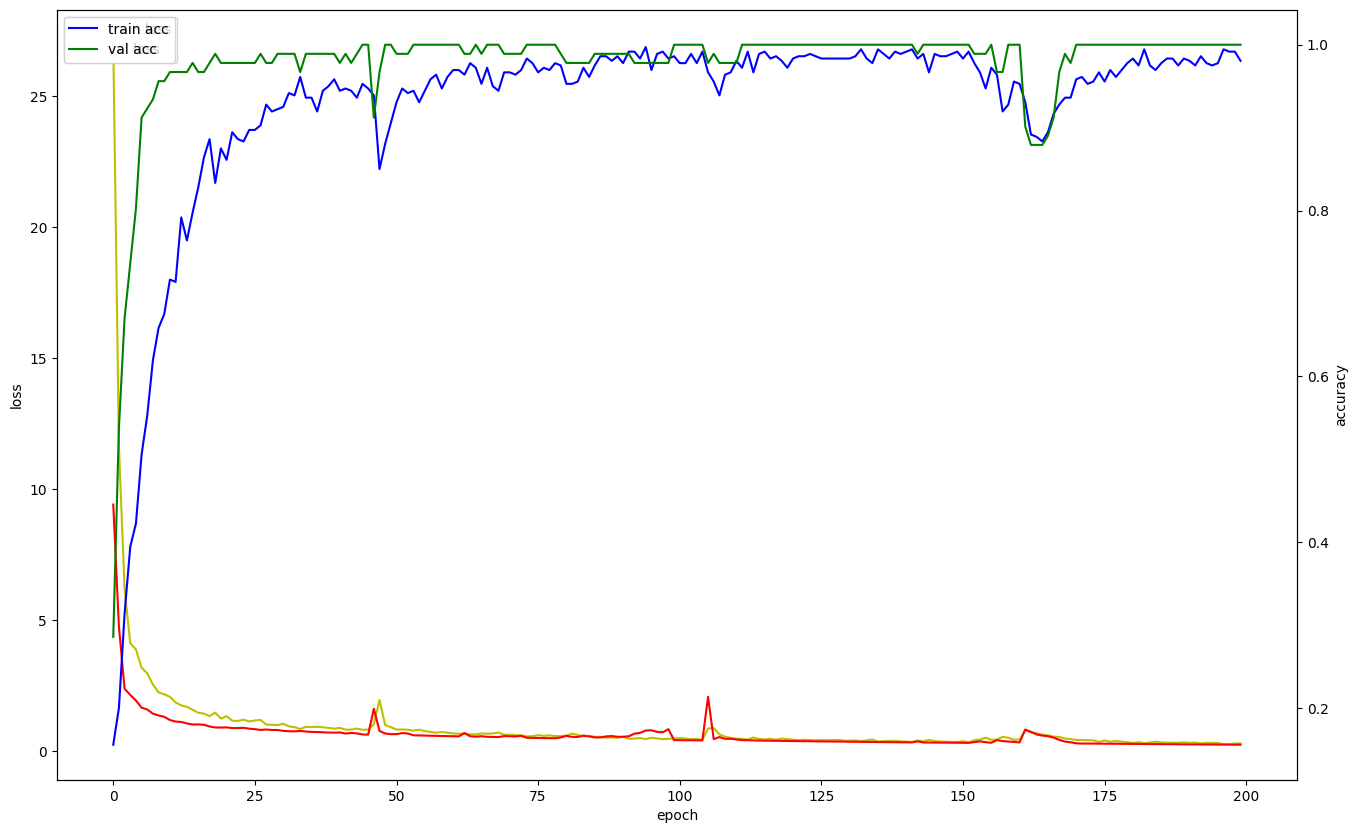

In [17]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

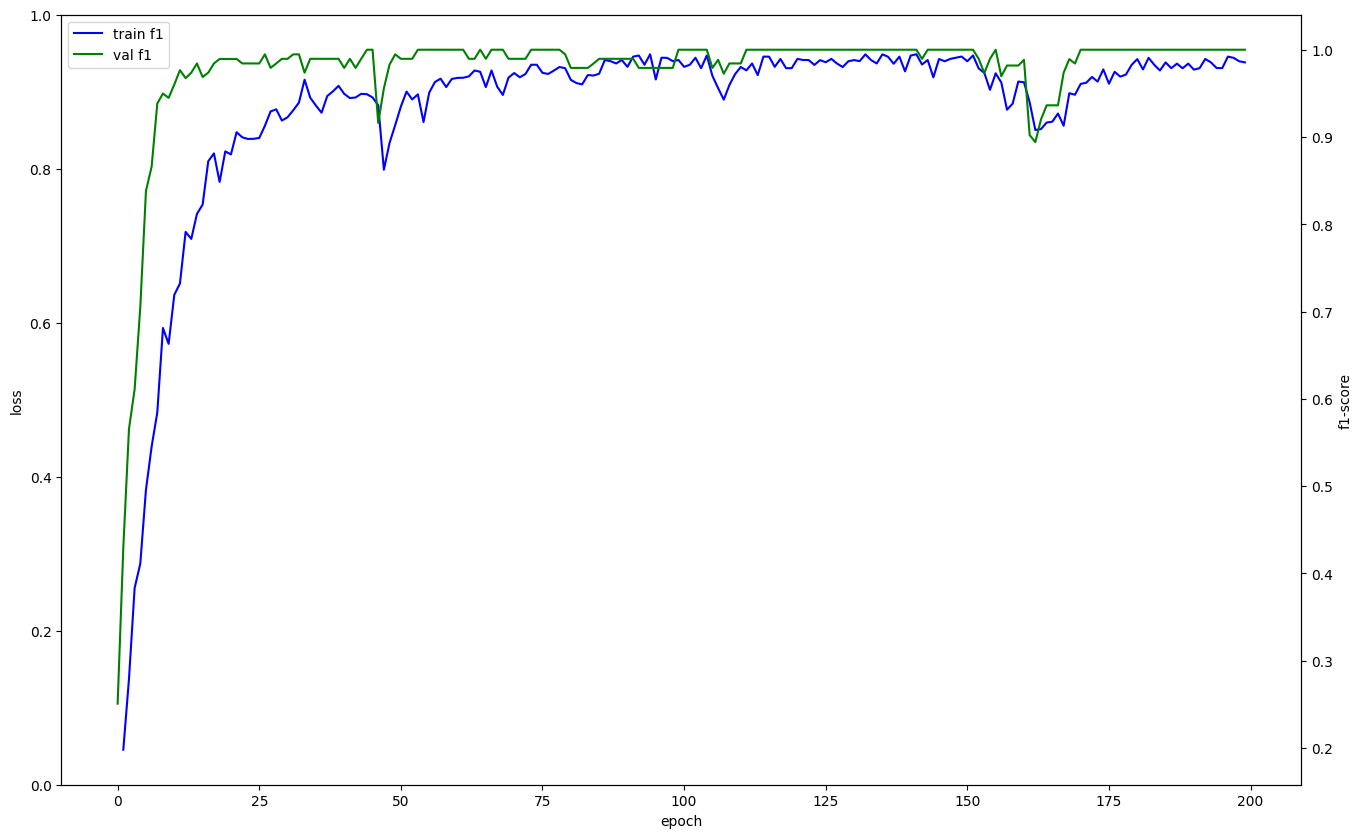

In [18]:
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['metric_f1score'], 'b', label='train f1')
acc_ax.plot(history.history['val_metric_f1score'], 'g', label='val f1')
acc_ax.set_ylabel('f1-score')
acc_ax.legend(loc='upper left')

plt.show()

In [19]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5', custom_objects = {'metric_F1score':metric_F1score})

y_pred = model.predict(x_val)
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[[82,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  4]],

       [[80,  0],
        [ 0, 11]],

       [[83,  0],
        [ 0,  8]],

       [[84,  0],
        [ 0,  7]],

       [[84,  0],
        [ 0,  7]],

       [[71,  0],
        [ 0, 20]],

       [[81,  0],
        [ 0, 10]],

       [[84,  0],
        [ 0,  7]],

       [[83,  0],
        [ 0,  8]]])

In [20]:
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[82,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  4]],

       [[80,  0],
        [ 0, 11]],

       [[83,  0],
        [ 0,  8]],

       [[84,  0],
        [ 0,  7]],

       [[84,  0],
        [ 0,  7]],

       [[71,  0],
        [ 0, 20]],

       [[81,  0],
        [ 0, 10]],

       [[84,  0],
        [ 0,  7]],

       [[83,  0],
        [ 0,  8]]])

In [21]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[[82,  0],
        [ 0,  9]],

       [[87,  0],
        [ 0,  4]],

       [[80,  0],
        [ 0, 11]],

       [[83,  0],
        [ 0,  8]],

       [[84,  0],
        [ 0,  7]],

       [[84,  0],
        [ 0,  7]],

       [[71,  0],
        [ 0, 20]],

       [[81,  0],
        [ 0, 10]],

       [[84,  0],
        [ 0,  7]],

       [[83,  0],
        [ 0,  8]]])

In [22]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 1. TF Lite 기본 연산 + Select TF ops 사용
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

# 2. TensorList lowering 비활성화
converter._experimental_lower_tensor_list_ops = False

# 변환 실행
tflite_model = converter.convert()

# 모델 저장
with open('models/multi_hand_gesture_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpumjh2q8r/assets


INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpumjh2q8r/assets


Saved artifact at '/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpumjh2q8r'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 55), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  13013431952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13013418400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13013432480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13013555808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13013552816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13013560384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13013663808: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1744797918.052726  607710 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744797918.052744  607710 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-16 19:05:18.053009: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpumjh2q8r
2025-04-16 19:05:18.053540: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-16 19:05:18.053545: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmpumjh2q8r
I0000 00:00:1744797918.058390  607710 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-16 19:05:18.059143: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-16 19:05:18.084373: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder